In [ ]:
# run this cell to install Julia
# F5 to refresh

%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools PyCall PyPlot"
JULIA_PACKAGES_IF_GPU="CUDA"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
fi

Installing Julia 1.6.0 on the current Colab Runtime...
2021-10-29 02:53:11 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package PyCall...
Installing Julia package PyPlot...
Installing Julia package CUDA...


In [ ]:
# Intializing plotting packages
using Pkg
Pkg.add("Plots")

using Plots
plotly();
gr();

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed SortingAlgorithms ──────────── v1.0.1
   Installed Xorg_libXrandr_jll ─────────── v1.5.2+4
   Installed Zstd_jll ───────────────────── v1.5.0+0
   Installed LZO_jll ────────────────────── v2.10.1+0
   Installed Missings ───────────────────── v1.0.2
   Installed StaticArrays ───────────────── v1.2.13
   Installed FFMPEG ─────────────────────── v0.4.1
   Installed HTTP ───────────────────────── v0.9.16
   Installed Xorg_libXau_jll ────────────── v1.0.9+4
   Installed JpegTurbo_jll ──────────────── v2.1.0+0
   Installed XML2_jll ───────────────────── v2.9.12+0
   Installed Measures ───────────────────── v0.3.1
   Installed GLFW_jll ───────────────────── v3.3.5+1
   Installed Xorg_libXfixes_jll ─────────── v5.0.3+4
   Installed IteratorInterfaceExtensions ── v1.0.0
   Installed Wayland_jll ────────────────── v1.19.0+0
   Installed Libgcrypt_jll ──────────────── v1.8.7+0
   Installed Xorg_xc

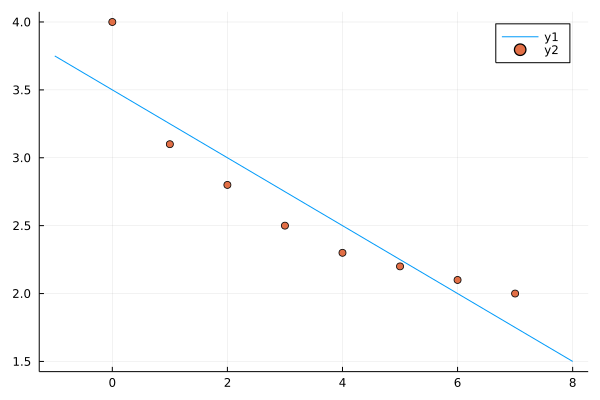

In [ ]:
# input X, Y
X = [0, 1, 2, 3, 4, 5, 6, 7]
Y = [4.0, 3.1, 2.8, 2.5, 2.3, 2.2, 2.1, 2.0]

# calculate weight z
A = [X ones(size(X)[1],1)]
z_l = (A'A)\(A'Y)

# create linear function
function f(x)
  return z_l[1]*x + z_l[2]
end

# plot graph
s = -1:0.5:8            # step size 0.5 from -1 to 8
t = f.(s)

plot(s,t)               # plot graph
scatter!(X,Y)           # plot points

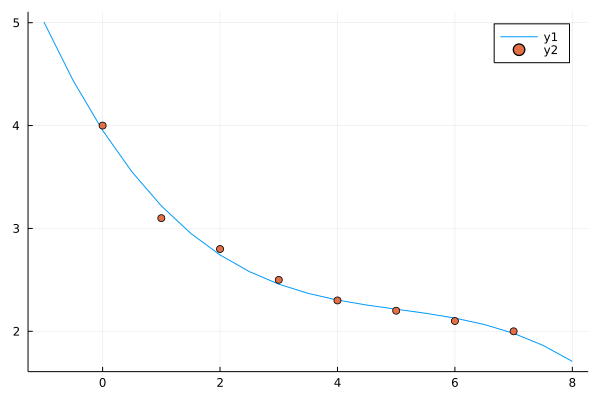

In [ ]:
# calculate weight z
A = [X.^3 X.^2 X ones(size(X)[1],1)]
z_c = (A'A)\(A'Y)

# create linear function
function g(x)
  return z_c[1]*x^3 + z_c[2]*x^2 + z_c[3]*x + z_c[4] 
end

# plot graph
s = -1:0.5:8            # step size 0.5 from -1 to 8
t = g.(s)

plot(s,t)               # plot graph
scatter!(X,Y)           # plot points

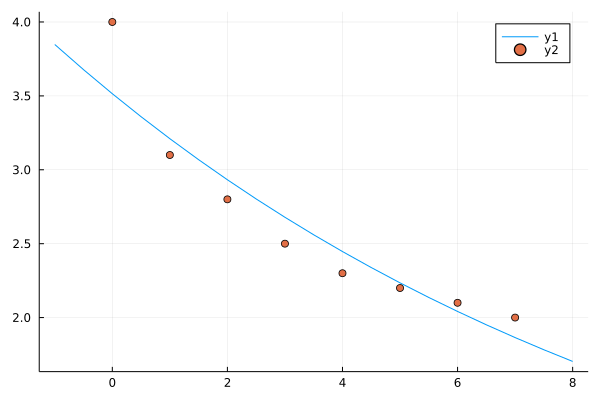

In [ ]:
# input X, Y
X = [0, 1, 2, 3, 4, 5, 6, 7]
Y = [4.0, 3.1, 2.8, 2.5, 2.3, 2.2, 2.1, 2.0]

lnY = log.(Y)

# calculate weight z
A = [X ones(size(X)[1],1)]
z_e = (A'A)\(A'lnY)

# create linear function
function h(x)
  return exp(z_e[2])*exp(z_e[1]*x)
end

# plot graph
s = -1:0.5:8            # step size 0.5 from -1 to 8
t = h.(s)

plot(s,t)               # plot graph
scatter!(X,Y)           # plot points

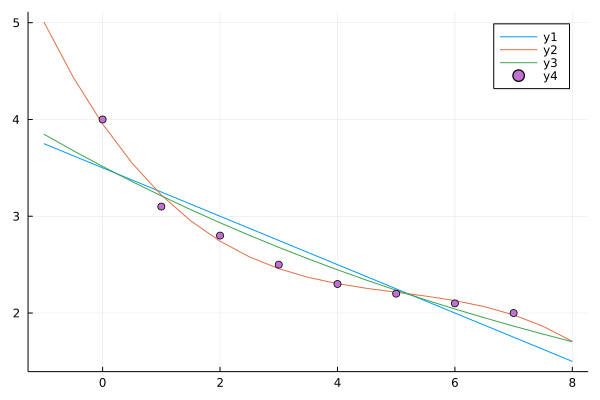

In [ ]:
# input X, Y
X = [0, 1, 2, 3, 4, 5, 6, 7]
Y = [4.0, 3.1, 2.8, 2.5, 2.3, 2.2, 2.1, 2.0]

# plot graph
s = -1:0.5:8            # step size 0.5 from -1 to 8
t1 = f.(s)
t2 = g.(s)
t3 = h.(s)

plot(s,t1)
plot!(s,t2)
plot!(s,t3)

# plot points
scatter!(X,Y)